# ML4N - Group Project 7
# Analysing Adversarial Attacks on Tabular Data Classifiers

In [69]:
# import needed python libraries
# Per ora ci ho messo quanta più roba potesse servire, in seguito rimuoviamo ciò che non serve 

%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import StrMethodFormatter
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# 1 Data exploration and preprocessing

### 1.1 Dataset Acquisition ###

In [70]:
#List of Attributes for dataset acquired from german.doc
#good/bad is the label 1 means good customer while 2 means bad
attributes = ["Status_account", "Duration", "Credit_history","Purpose",
             "Credit_amount","Savings_account/bonds","Employment_since","Install_rate",
              "Personal_status_sex","debtors_guarantors","Present_residence_since",
              "Property","Age","Other_install_plans","Housing","No_credits","Job",
              "No_people_liable","Telephone","foreign_worker","good/bad"] 

#Acquiring dataset from german.data file
df = pd.read_csv("german.data", sep=' ', names = attributes)
df

Status_account  Duration Credit_history Purpose  Credit_amount  \
0              A11         6            A34     A43           1169   
1              A12        48            A32     A43           5951   
2              A14        12            A34     A46           2096   
3              A11        42            A32     A42           7882   
4              A11        24            A33     A40           4870   
..             ...       ...            ...     ...            ...   
995            A14        12            A32     A42           1736   
996            A11        30            A32     A41           3857   
997            A14        12            A32     A43            804   
998            A11        45            A32     A43           1845   
999            A12        45            A34     A41           4576   

    Savings_account/bonds Employment_since  Install_rate Personal_status_sex  \
0                     A65              A75             4                 A93   
1                     A61              A73             2                 A92   
2                     A61              A74             2                 A93   
3                     A61              A74             2                 A93   
4                     A61              A73             3                 A93   
..                    ...              ...           ...                 ...   
995                   A61              A74             3                 A92   
996                   A61              A73             4                 A91   
997                   A61              A75             4                 A93   
998                   A61              A73             4                 A93   
999                   A62              A71             3                 A93   

    debtors_guarantors  ...  Property Age  Other_install_plans Housing  \
0                 A101  ...      A121  67                 A143    A152   
1                 A101  ...      A121  22                 A143    A152   
2                 A101  ...      A121  49                 A143    A152   
3                 A103  ...      A122  45                 A143    A153   
4                 A101  ...      A124  53                 A143    A153   
..                 ...  ...       ...  ..                  ...     ...   
995               A101  ...      A121  31                 A143    A152   
996               A101  ...      A122  40                 A143    A152   
997               A101  ...      A123  38                 A143    A152   
998               A101  ...      A124  23                 A143    A153   
999               A101  ...      A123  27                 A143    A152   

    No_credits   Job No_people_liable  Telephone foreign_worker good/bad  
0            2  A173                1       A192           A201        1  
1            1  A173                1       A191           A201        2  
2            1  A172                2       A191           A201        1  
3            1  A173                2       A191           A201        1  
4            2  A173                2       A191           A201        2  
..         ...   ...              ...        ...            ...      ...  
995          1  A172                1       A191           A201        1  
996          1  A174                1       A192           A201        1  
997          1  A173                1       A191           A201        1  
998          1  A173                1       A192           A201        2  
999          1  A173                1       A191           A201        1  

[1000 rows x 21 columns]

### 1.2 Data Preprocessing ###

In [75]:
#Qualitative attributes that do not require encoding 
to_remove = ["Duration","Credit_amount","Install_rate","Present_residence_since",
             "Age","No_credits","No_people_liable","good/bad"] 

#Creating the list with the categorical attributes to be encoded
to_be_encoded = attributes.copy()
for el in to_remove:
    to_be_encoded.remove(el)

#K normalizing only the numerical values before one hot encoding for later uses 
scaler2 = MinMaxScaler()
df_normalized_with_categorical = df.copy()
df_normalized_with_categorical[to_remove] = scaler2.fit_transform(df_normalized_with_categorical[to_remove])
#display(df_normalized_with_categorical)

#Using One Hot Encoding to transform categorical attributes into qualitative ones
df_encoded = pd.get_dummies(df, columns=to_be_encoded, dtype = int)
display(df_encoded)

#Normalization between [0,1] and split into 80% training and 20% test 
#Note: Might be worth using k-fold Cross Validation or some other way
scaler = MinMaxScaler()


#K creation of the pandas dataframe of the normalized values
array_df_encoded2 = scaler.fit_transform(df_encoded)

df_normalized = pd.DataFrame(array_df_encoded2, columns=df_encoded.columns)
df_normalized

Duration  Credit_amount  Install_rate  Present_residence_since  Age  \
0           6           1169             4                        4   67   
1          48           5951             2                        2   22   
2          12           2096             2                        3   49   
3          42           7882             2                        4   45   
4          24           4870             3                        4   53   
..        ...            ...           ...                      ...  ...   
995        12           1736             3                        4   31   
996        30           3857             4                        4   40   
997        12            804             4                        4   38   
998        45           1845             4                        4   23   
999        45           4576             3                        4   27   

     No_credits  No_people_liable  good/bad  Status_account_A11  \
0             2                 1         1                   1   
1             1                 1         2                   0   
2             1                 2         1                   0   
3             1                 2         1                   1   
4             2                 2         2                   1   
..          ...               ...       ...                 ...   
995           1                 1         1                   0   
996           1                 1         1                   1   
997           1                 1         1                   0   
998           1                 1         2                   1   
999           1                 1         1                   0   

     Status_account_A12  ...  Housing_A152  Housing_A153  Job_A171  Job_A172  \
0                     0  ...             1             0         0         0   
1                     1  ...             1             0         0         0   
2                     0  ...             1             0         0         1   
3                     0  ...             0             1         0         0   
4                     0  ...             0             1         0         0   
..                  ...  ...           ...           ...       ...       ...   
995                   0  ...             1             0         0         1   
996                   0  ...             1             0         0         0   
997                   0  ...             1             0         0         0   
998                   0  ...             0             1         0         0   
999                   1  ...             1             0         0         0   

     Job_A173  Job_A174  Telephone_A191  Telephone_A192  foreign_worker_A201  \
0           1         0               0               1                    1   
1           1         0               1               0                    1   
2           0         0               1               0                    1   
3           1         0               1               0                    1   
4           1         0               1               0                    1   
..        ...       ...             ...             ...                  ...   
995         0         0               1               0                    1   
996         0         1               0               1                    1   
997         1         0               1               0                    1   
998         1         0               0               1                    1   
999         1         0               1               0                    1   

     foreign_worker_A202  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
..                   ...  
995                    0  
996                    0  
997                    0  
998                    0  
999                    0  

[1000 rows x 62 columns]

Duration  Credit_amount  Install_rate  Present_residence_since       Age  \
0    0.029412       0.050567      1.000000                 1.000000  0.857143   
1    0.647059       0.313690      0.333333                 0.333333  0.053571   
2    0.117647       0.101574      0.333333                 0.666667  0.535714   
3    0.558824       0.419941      0.333333                 1.000000  0.464286   
4    0.294118       0.254209      0.666667                 1.000000  0.607143   
..        ...            ...           ...                      ...       ...   
995  0.117647       0.081765      0.666667                 1.000000  0.214286   
996  0.382353       0.198470      1.000000                 1.000000  0.375000   
997  0.117647       0.030483      1.000000                 1.000000  0.339286   
998  0.602941       0.087763      1.000000                 1.000000  0.071429   
999  0.602941       0.238032      0.666667                 1.000000  0.142857   

     No_credits  No_people_liable  good/bad  Status_account_A11  \
0      0.333333               0.0       0.0                 1.0   
1      0.000000               0.0       1.0                 0.0   
2      0.000000               1.0       0.0                 0.0   
3      0.000000               1.0       0.0                 1.0   
4      0.333333               1.0       1.0                 1.0   
..          ...               ...       ...                 ...   
995    0.000000               0.0       0.0                 0.0   
996    0.000000               0.0       0.0                 1.0   
997    0.000000               0.0       0.0                 0.0   
998    0.000000               0.0       1.0                 1.0   
999    0.000000               0.0       0.0                 0.0   

     Status_account_A12  ...  Housing_A152  Housing_A153  Job_A171  Job_A172  \
0                   0.0  ...           1.0           0.0       0.0       0.0   
1                   1.0  ...           1.0           0.0       0.0       0.0   
2                   0.0  ...           1.0           0.0       0.0       1.0   
3                   0.0  ...           0.0           1.0       0.0       0.0   
4                   0.0  ...           0.0           1.0       0.0       0.0   
..                  ...  ...           ...           ...       ...       ...   
995                 0.0  ...           1.0           0.0       0.0       1.0   
996                 0.0  ...           1.0           0.0       0.0       0.0   
997                 0.0  ...           1.0           0.0       0.0       0.0   
998                 0.0  ...           0.0           1.0       0.0       0.0   
999                 1.0  ...           1.0           0.0       0.0       0.0   

     Job_A173  Job_A174  Telephone_A191  Telephone_A192  foreign_worker_A201  \
0         1.0       0.0             0.0             1.0                  1.0   
1         1.0       0.0             1.0             0.0                  1.0   
2         0.0       0.0             1.0             0.0                  1.0   
3         1.0       0.0             1.0             0.0                  1.0   
4         1.0       0.0             1.0             0.0                  1.0   
..        ...       ...             ...             ...                  ...   
995       0.0       0.0             1.0             0.0                  1.0   
996       0.0       1.0             0.0             1.0                  1.0   
997       1.0       0.0             1.0             0.0                  1.0   
998       1.0       0.0             0.0             1.0                  1.0   
999       1.0       0.0             1.0             0.0                  1.0   

     foreign_worker_A202  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
..                   ...  
995                  0.0  
996                  0.0  
997                  0.0  
998                  0.0  
999     

### 1.3 Exploratory Data Analysis ###


Histogram with the means of critical data differences between people whose loan is accepted("good people") and people whose isn't ("bad people"):



Duration  Credit_amount  Install_rate  Present_residence_since       Age  \
0    0.029412       0.050567      1.000000                 1.000000  0.857143   
1    0.647059       0.313690      0.333333                 0.333333  0.053571   
2    0.117647       0.101574      0.333333                 0.666667  0.535714   
3    0.558824       0.419941      0.333333                 1.000000  0.464286   
4    0.294118       0.254209      0.666667                 1.000000  0.607143   
..        ...            ...           ...                      ...       ...   
995  0.117647       0.081765      0.666667                 1.000000  0.214286   
996  0.382353       0.198470      1.000000                 1.000000  0.375000   
997  0.117647       0.030483      1.000000                 1.000000  0.339286   
998  0.602941       0.087763      1.000000                 1.000000  0.071429   
999  0.602941       0.238032      0.666667                 1.000000  0.142857   

     No_credits  No_people_liable  good/bad  
0      0.333333               0.0       0.0  
1      0.000000               0.0       1.0  
2      0.000000               1.0       0.0  
3      0.000000               1.0       0.0  
4      0.333333               1.0       1.0  
..          ...               ...       ...  
995    0.000000               0.0       0.0  
996    0.000000               0.0       0.0  
997    0.000000               0.0       0.0  
998    0.000000               0.0       1.0  
999    0.000000               0.0       0.0  

[1000 rows x 8 columns]

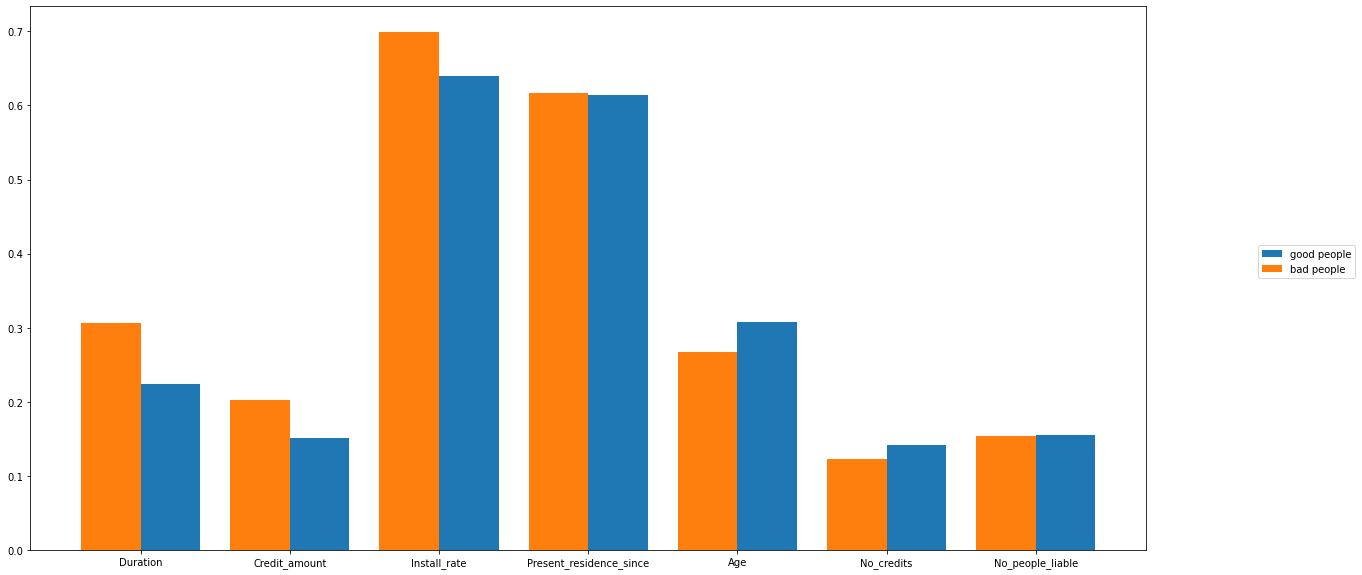

normal numerical


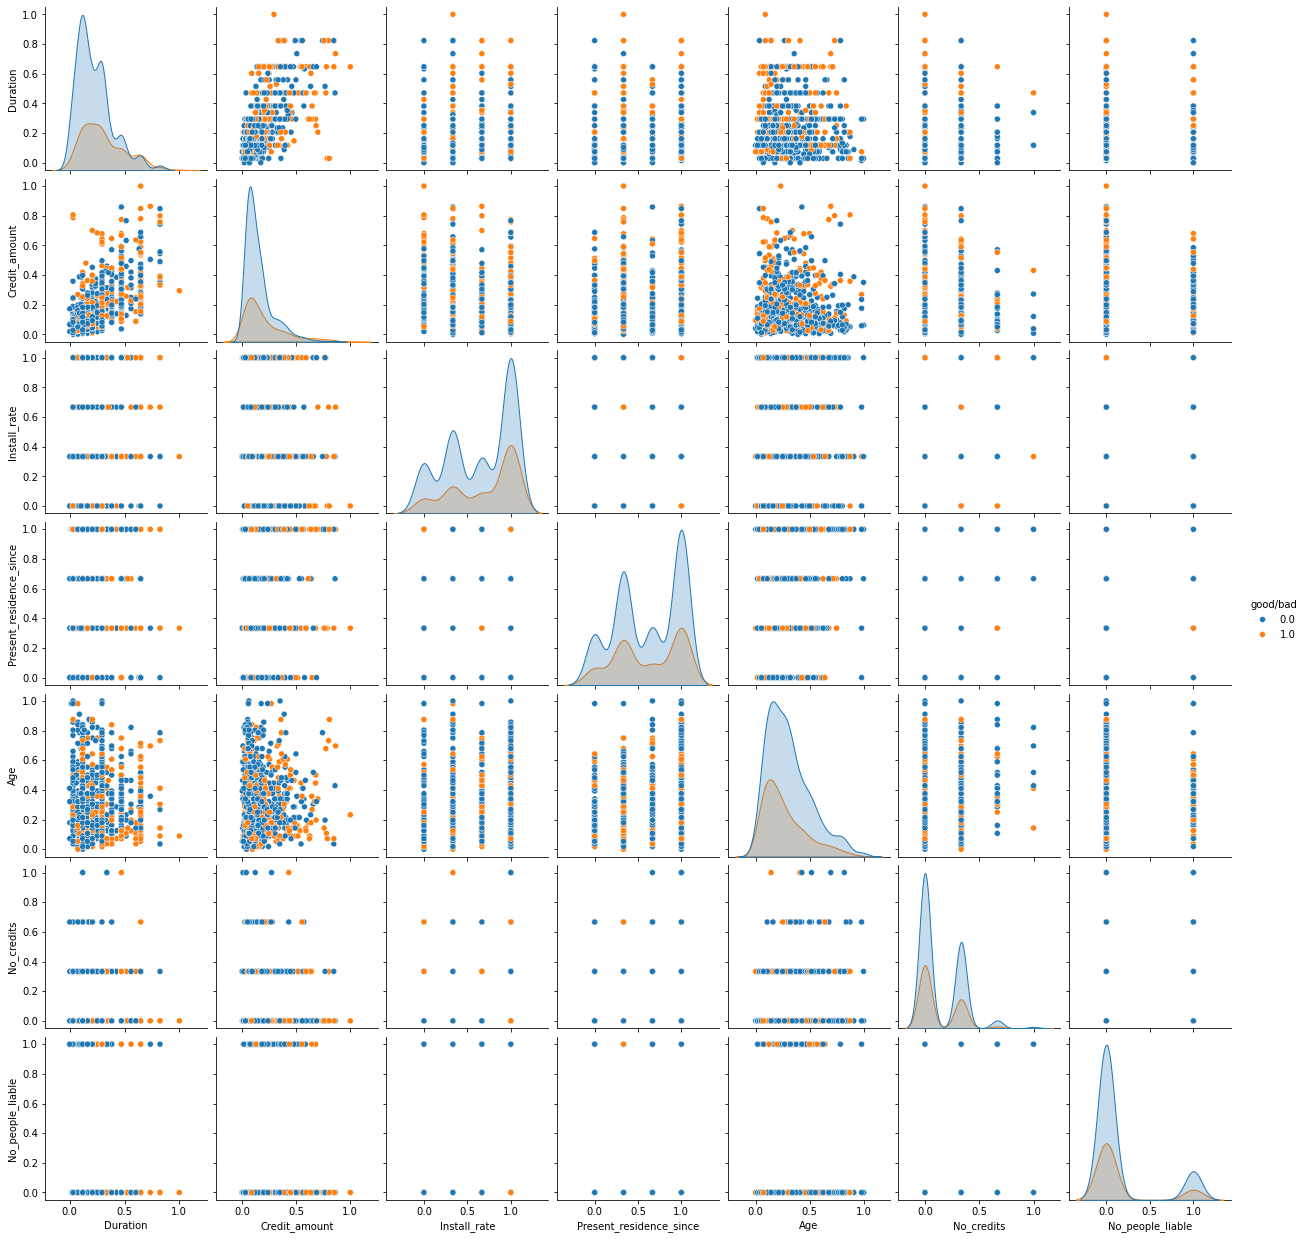

Status_account A11


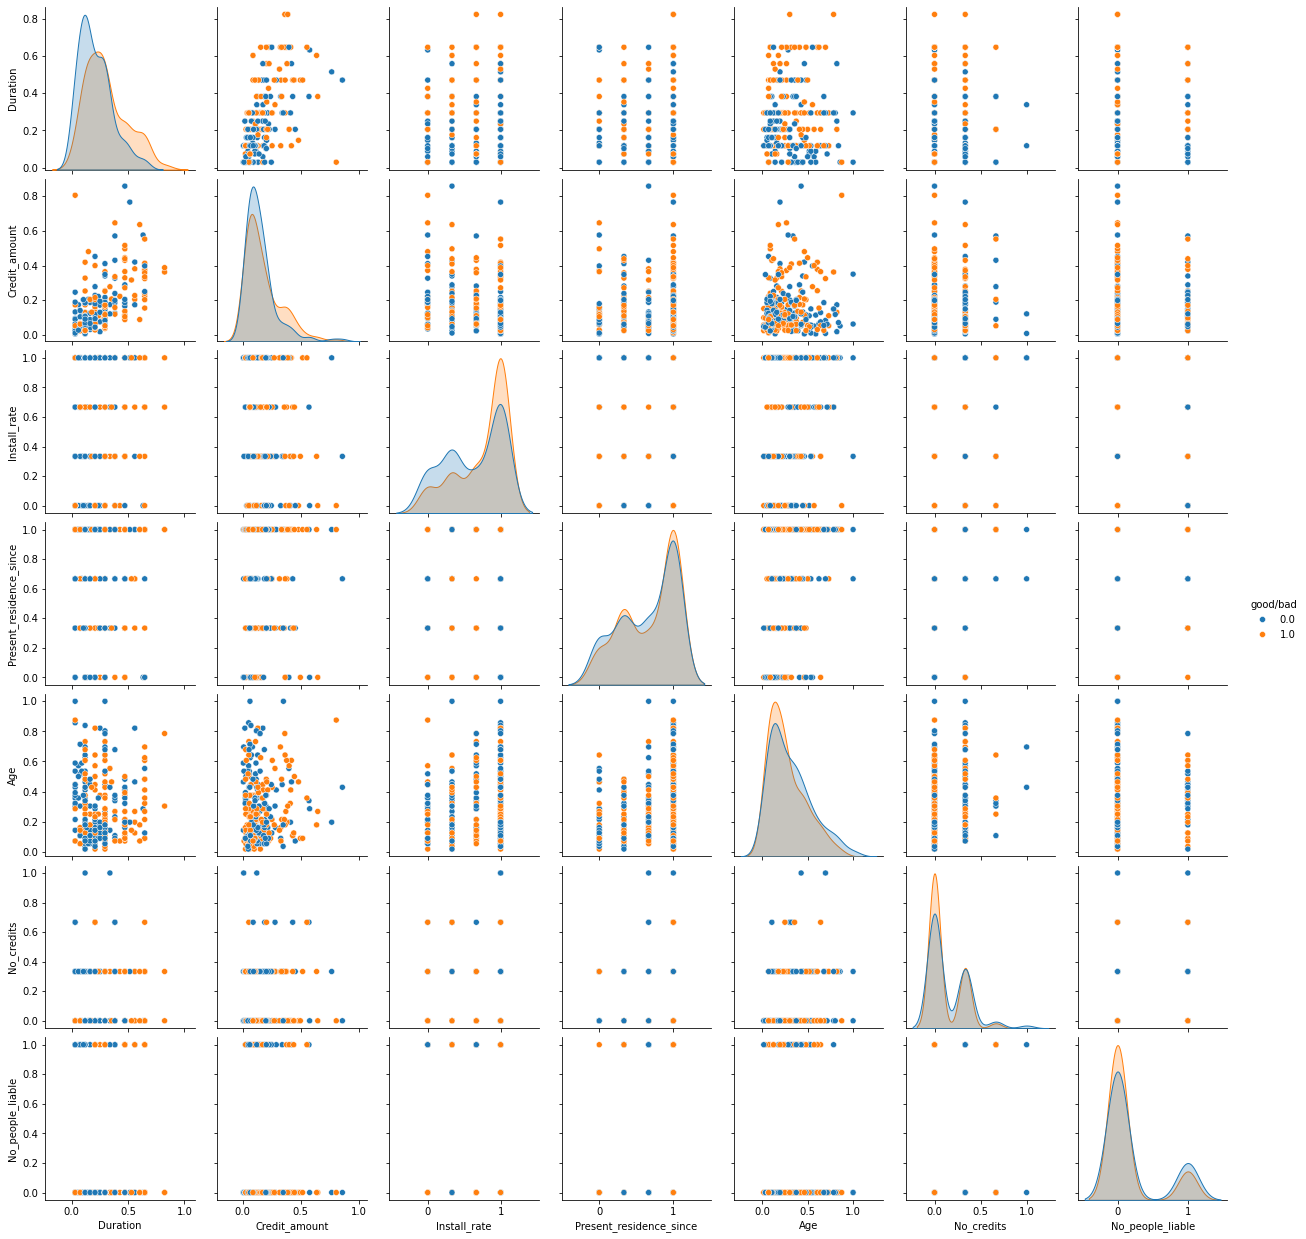

Status_account A12


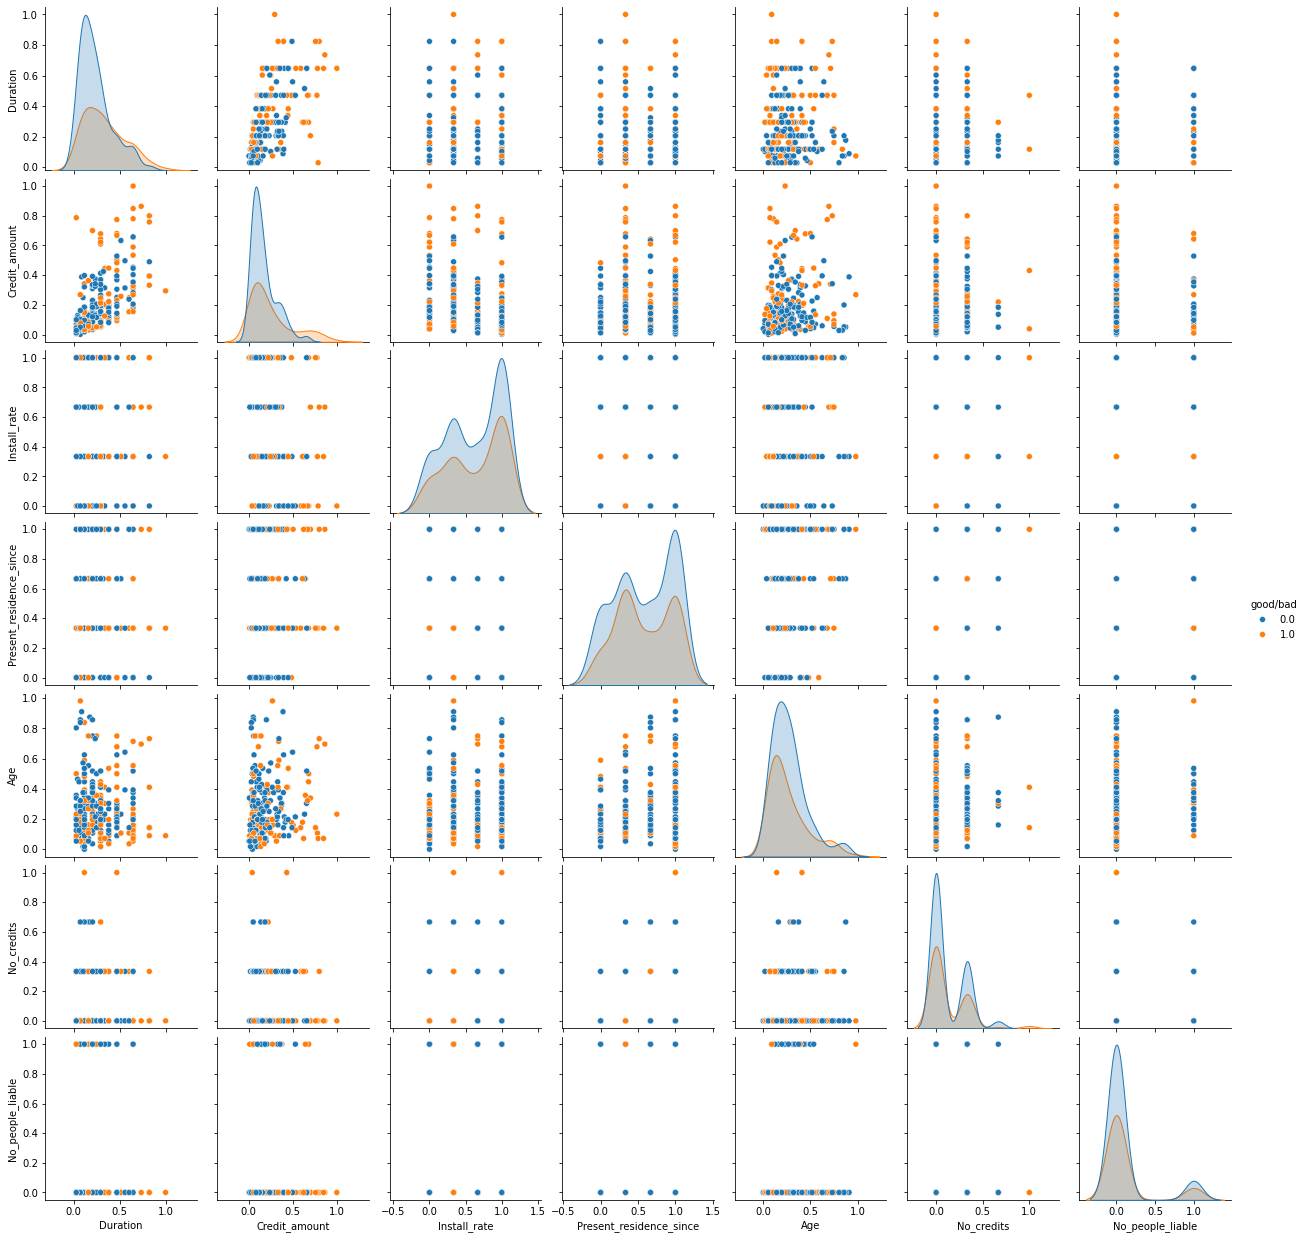

Status_account A13


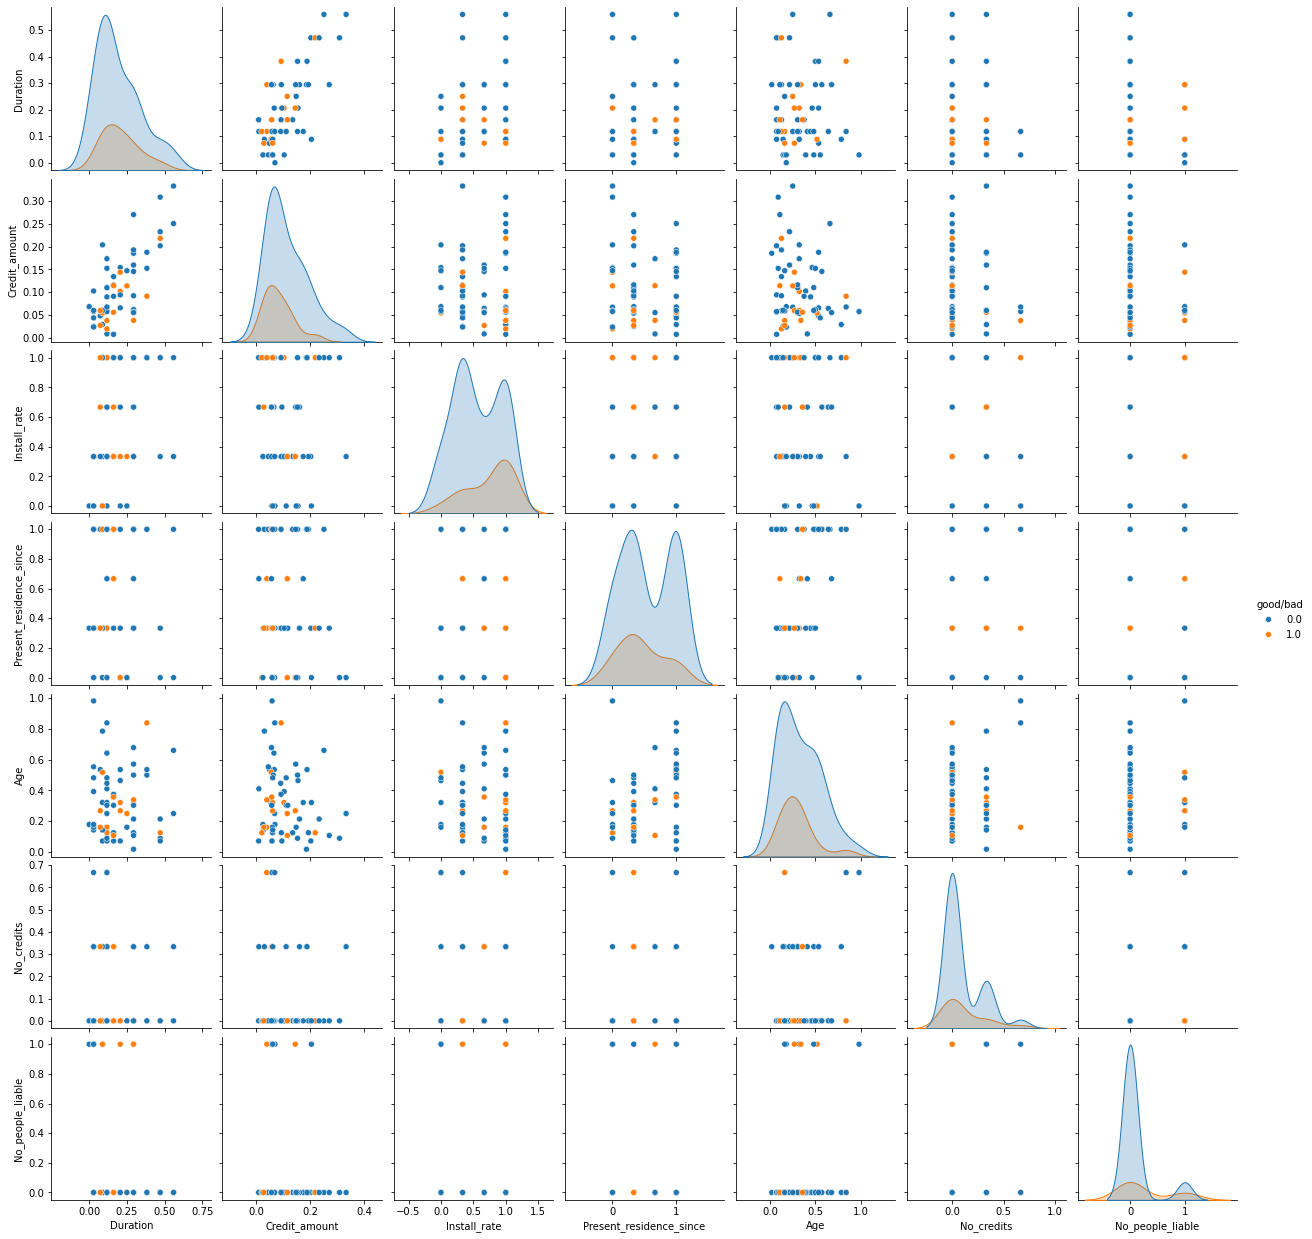

Status_account A14


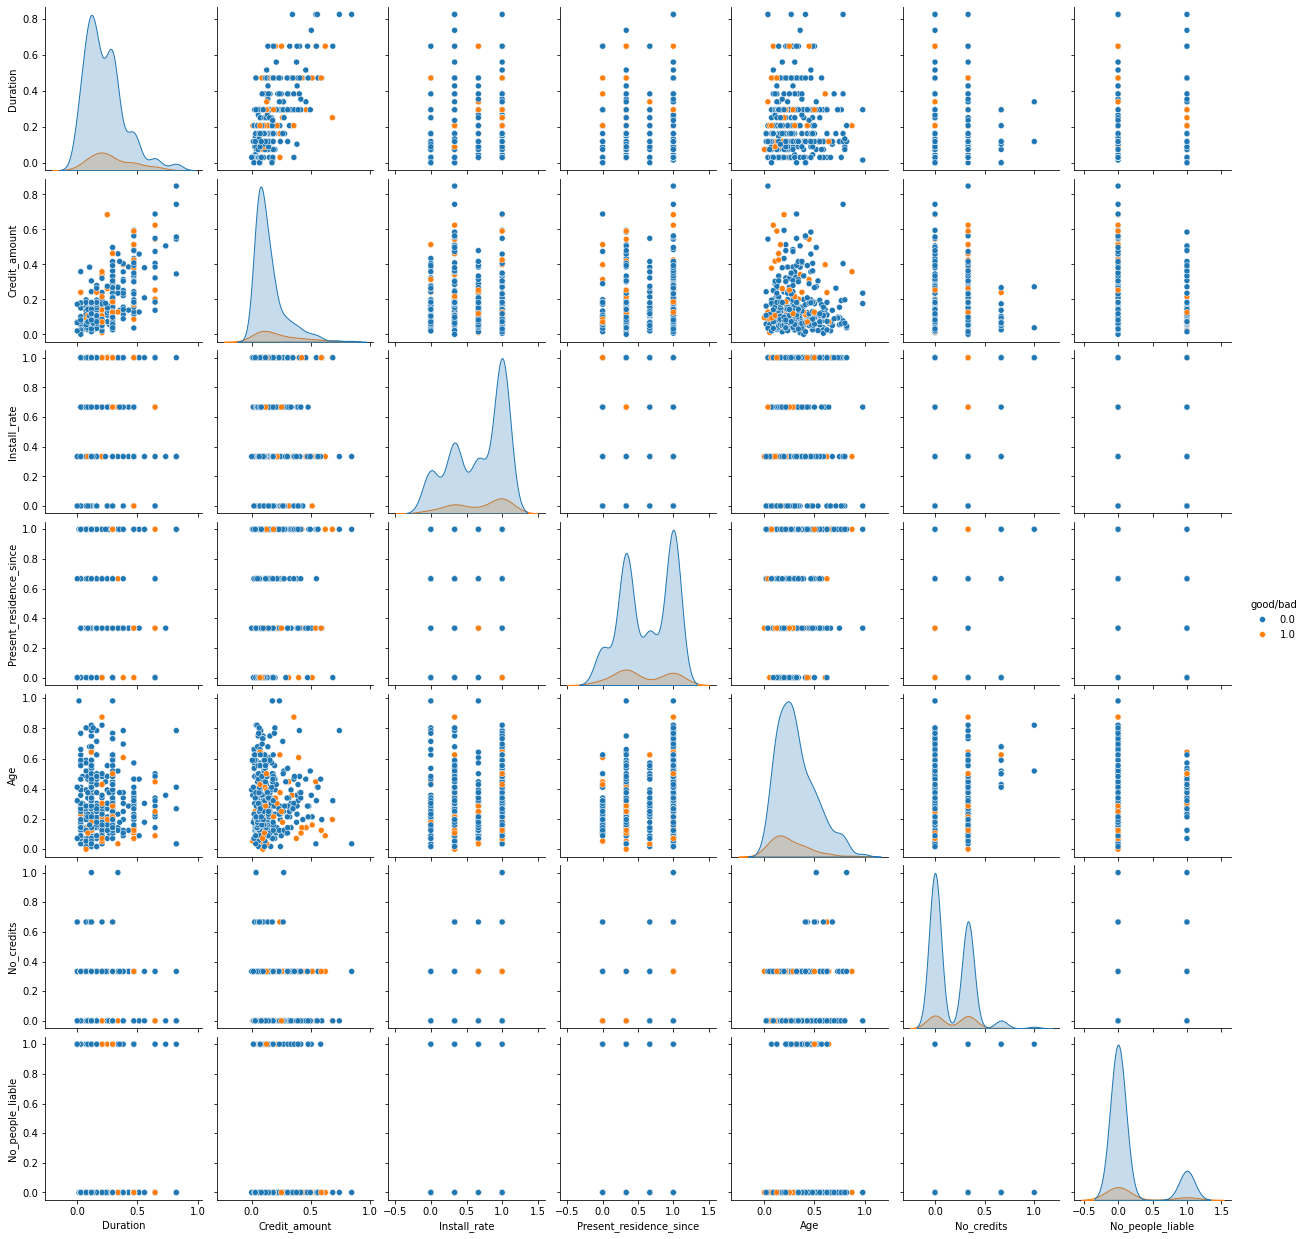

In [74]:
####### Histograms of average values
print("\nHistogram with the means of critical data differences between people whose loan is accepted(\"good people\") and people whose isn't (\"bad people\"):\n")

### removing useless columns for means

## Creating the list with the categorical attributes to be encoded
to_remove_new = []
attributes_numerical = ["Duration", "Credit_amount", "Install_rate",
              "Present_residence_since","Age","No_credits",
              "No_people_liable","good/bad"] 


for el in df_normalized.columns.tolist():
    if el in attributes_numerical:
        pass
    else:
        to_remove_new.append(el)
#print(to_remove_new)

df_normalized_numerical = df_normalized.drop(to_remove_new, axis = 1)
display(df_normalized_numerical)


####### separating "good customer" from "bad customer" data

df_normalized_good = df_normalized_numerical.loc[df_normalized["good/bad"]==0.0]
#display(df_normalized_good)
df_normalized_bad = df_normalized_numerical.loc[df_normalized["good/bad"]==1.0]
#display(df_normalized_good)


####### removing the label column

df_normalized_no_label_good = df_normalized_good.drop("good/bad", axis = 1)
df_normalized_no_label_bad = df_normalized_bad.drop("good/bad", axis = 1)
df_normalized_no_label = df_normalized.drop("good/bad", axis = 1)
# display(df_normalized_no_label_good)

####### calculating means

columns_means_good = df_normalized_no_label_good.mean().tolist()
columns_means_bad = df_normalized_no_label_bad.mean().tolist()

####### showing the bar plot
x = np.arange(7)
width = 0.4
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x+width/2, columns_means_good, width=0.4, label="good people")
ax.bar(x-width/2, columns_means_bad, width=0.4, label="bad people")
ax.set_xticks(x, df_normalized_no_label_good.columns.tolist())
ax.legend(loc=(1.1,0.5))
plt.show()


####### Scatter plots of most interestring features????
print("normal numerical")
sns.pairplot(df_normalized_numerical, hue='good/bad')
plt.show()
for x in ["A11","A12","A13","A14"]:
    print(f"Status_account {x}")
    sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Status_account"]==x, to_remove], hue='good/bad')
    plt.show()
# for x in ["A30","A31","A32", "A33", "A34"]:
#     print(f"Credit_history {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Credit_history"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A40","A41","A42", "A43", "A44", "A45", "A46", "A47" ,"A48" ,"A49" ,"A410" ]:
#     print(f"Purpose {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Purpose"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A61","A62","A63", "A64", "A65"]:
#     print(f"Savings_account/bonnds {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Savings_account/bonds"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A71","A72","A73", "A74", "A75"]:
#     print(f"Employment_since {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Employment_since"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A91","A92","A93", "A94", "A95"]:
#     print(f"Personal_status_sex {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Personal_status_sex"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A101","A102","A103"]:
#     print(f"debtors_guarantors {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["debtors_guarantors"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A121","A122","A123", "A124"]:
#     print(f"Property {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Property"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A141","A142","A143"]:
#     print(f"Other_install_plans {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Other_install_plans"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A151","A152","A153"]:
#     print(f"Housing {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Housing"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A171","A172","A173", "A174"]:
#     print(f"Job {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Job"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A191","A192"]:
#     print(f"Telephone {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["Telephone"]==x, to_remove], hue='good/bad')
#     plt.show()
# for x in ["A201", "A202"]:
#     print(f"foreign_worker {x}")
#     sns.pairplot(df_normalized_with_categorical.loc[df_normalized_with_categorical["foreign_worker"]==x, to_remove], hue='good/bad')
#     plt.show()

    
#     

####### Correlation Matrices

####### Provide insights into under-lying patterns and, most importantly, 
####### identify features significantly influencing loan risk classification







## notes:
#56
# 1: Duration - Bad people usually have a longer duration of the loan in respect of good people (~10% more)
# 2: Credit Amount - Bad people usually have a bigger Credit respect of good people (~5% more)
# 3: Install rate - Bad people usually have a bigger installation rate of the loan in respect of good people (~5% more)
# 4: Age - Bad people are usually youger than good people (~5% less)
# 5: !not sure! Status_account A13 (no_credits) | Whithin The people with a Status of existing checking account with >= 200 DM or salary assignments for at least 1 year, good people usually are the ones with a bigger number of credits 
# 6: Credit_history A31 (Credit amount) | Whithin people that have all credits at this bank paid back duly, the ones with a credit amount much superior of the mean, are usually bad people
# 7: !not sure! Credit_history A34 (Credit Amount) | Whithin people that have critical account or have other credits existing (not at this bank), if they have a credit amount in the mean, they are usually good people
# 8: Purpose A41 (All, (no credits no people)) | Whithin people that have credit on used cars, good people are usually the one with a Duration of the credit, credit amount, install rate, lower than the mean of each values
# 9: Purpose A44 (Credit Amount, Install Rate, Age, No credits) | ...
# 10: Purpose A45 (Credit Amount) ...
# 11: Purpose A46 (Age) ...
# 12: Purpose A48 (All) ...
# 13: Savings Account A64 (Present_residence_since)(inverse) ...
# 14: Property A124 (Install rate) ...
# 15: Other install plans A142 (No_credits) ...
# 16: Housing A153 (Install rate) ...
# 17: Job A171 (Duration,No credits) ...
# 18: Foreign worker A202 (All) ...

# 2 Unsupervised exploration and clustering #

### 2.1 Dimensionality reduction for data visualization ###

<function matplotlib.pyplot.show(close=None, block=None)>

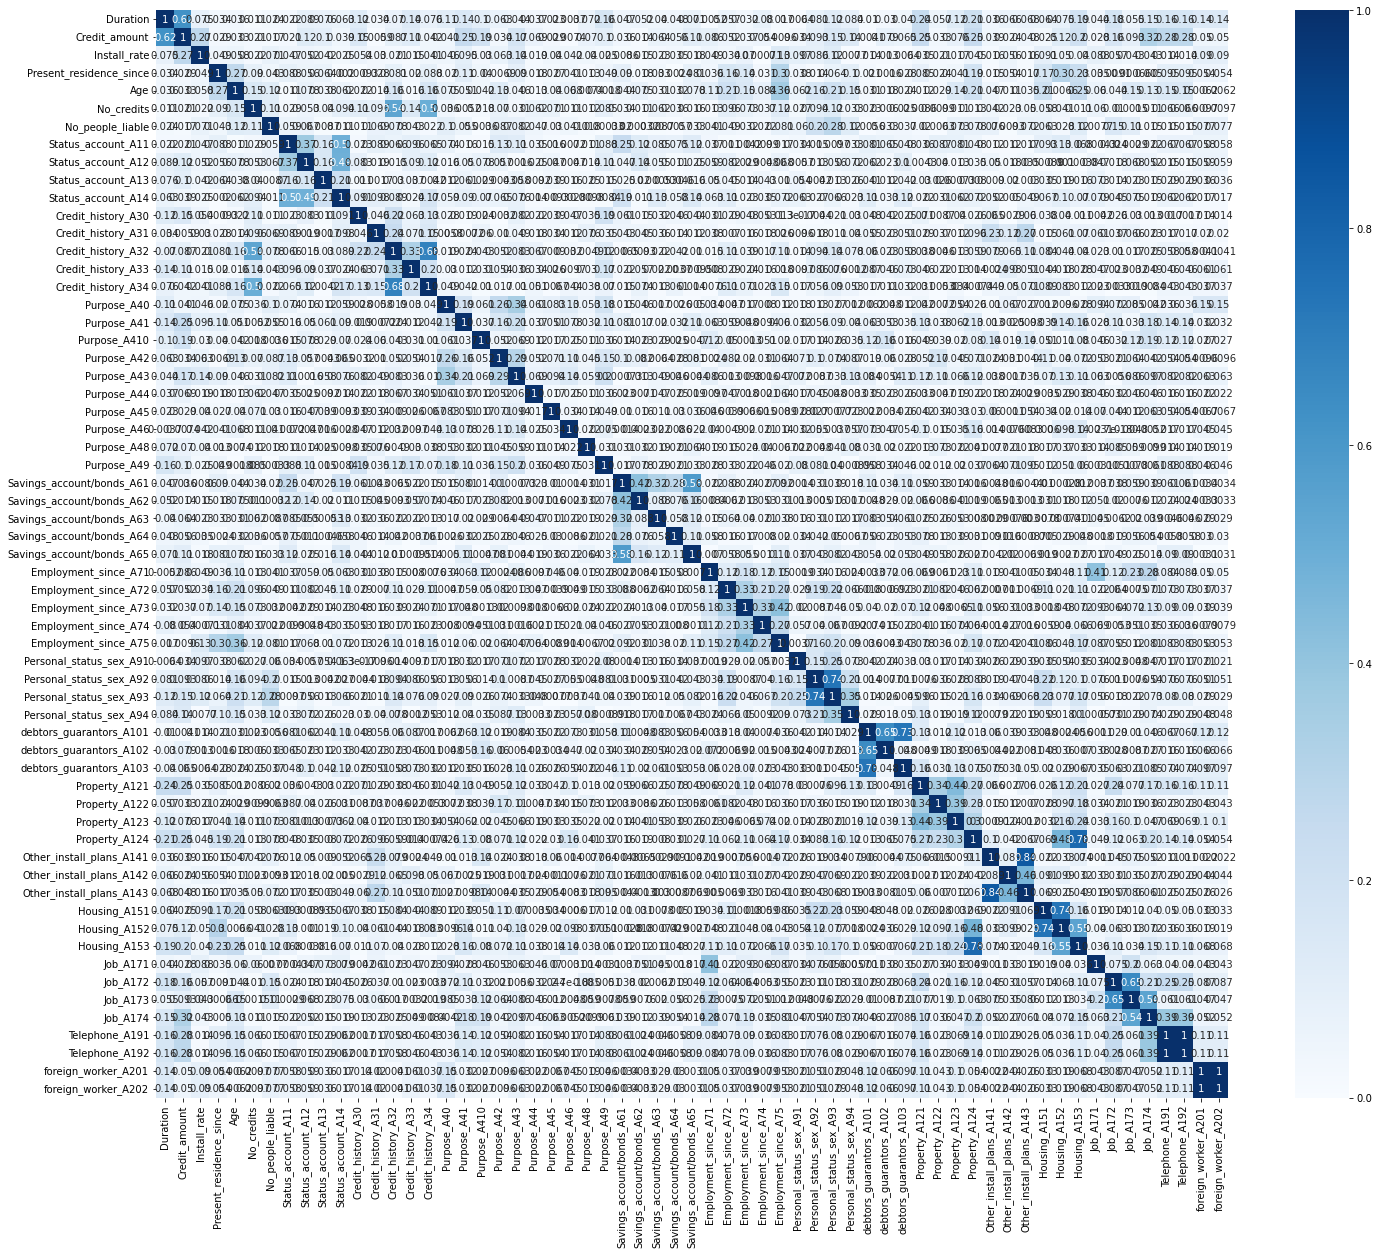

In [81]:
# Apply dimensionality reduction techniques: t-Distributed Stochastic Neighbor Embedding (t-SNE)
# and Principal Component Analysis (PCA) to reduce and visualize the data.

#I compute the correlation between the features to see if there are any correlated features
correlation_analysis = df_normalized_no_label.corr().abs()

plt.figure(figsize = (24,20))
sns.heatmap(correlation_analysis, cmap="Blues", annot=True)
plt.show


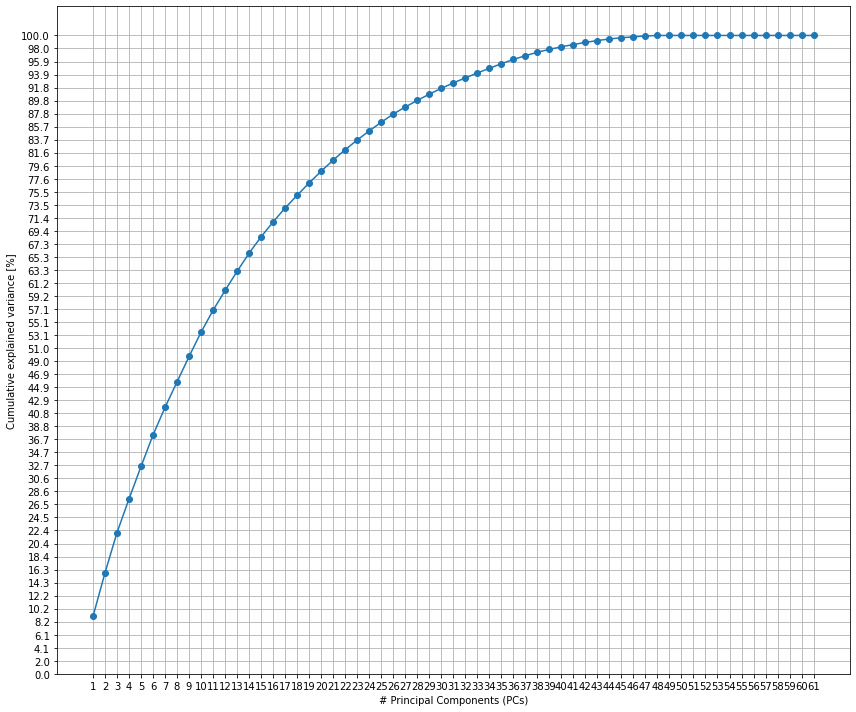

In [82]:
#Aproximately 10 columns will be removed by performing PCA

columns_no_label = df_normalized_no_label.columns
pca = PCA(random_state = 15)
pca.fit(df_normalized_no_label[columns_no_label])


explained_variance = pca.explained_variance_ratio_ #Here i compute the variability of the dataset, while the varaible number keeps increasing, 
                                                    #until reaching all the number
cum_exp_var = np.cumsum(explained_variance)    #This allows to represent the sum for each step (remember 61 features)
perc_cum_exp_var = cum_exp_var * 100          #Representing it in percentage
 

# make the plot of cumulative explained variance wrt number of components
plt.figure(figsize=(12, 10))
plt.plot(perc_cum_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.xticks([i for i in range(61)], [i for i in range(1,62)])
plt.yticks(np.linspace(0,100, 50))
plt.grid()
plt.tight_layout()
plt.show()

# for i in range (len(perc_cum_exp_var)):
#     print(i, ":", perc_cum_exp_var[i])



In [83]:
# I Apply t-SNE for dimensionality reduction
perplexities = [5, 10, 20, 30, 50]
learning_rate = np.linspace(10, 1000, 5)

plt.figure(figsize=(15, 10))

for i, perplexity in enumerate(perplexities, 1):
    for lr in learning_rate:
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, learning_rate = lr)
        X_tsne = tsne.fit_transform(df_normalized_no_label[columns_no_label])
        if (perplexity == 5 and lr == 10):
            transformed_df_t_sne = pd.DataFrame(X_tsne, columns = ['C1', 'C2'])

        # scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
        # plt.title(f't-SNE Visualization (Perplexity={perplexity}, Learning Rate={lr})')
        # plt.show()

transformed_df_t_sne

C1         C2
0     9.387000  45.106659
1   -21.120193 -25.617643
2   -48.730602  24.894571
3   -40.195545   8.426905
4    43.167259  44.267723
..         ...        ...
995 -20.166744  -7.803782
996  47.526978   4.838389
997  -8.807094  29.463387
998  35.353855  29.948048
999   9.266341   8.248801

[1000 rows x 2 columns]

<Figure size 1080x720 with 0 Axes>

In [84]:
#I choose 45 components because i'll be able to describe 99.78% of the entire dataset
pca = PCA(n_components = 45, random_state = 15)
pca.fit(df_normalized_no_label[columns_no_label])

transformed_df = pca.transform(df_normalized_no_label[columns_no_label])

columns_transformed_df = [f'PC{i}' for i in range(0,45)]

transformed_df_pca = pd.DataFrame(transformed_df, columns=columns_transformed_df)
transformed_df_pca


PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0    1.093896 -0.671381  0.071017  0.303321  0.084118 -0.110836 -0.417682   
1   -1.416504  0.091914 -0.554413 -0.452032 -0.045156  0.024576 -0.116422   
2   -0.057365 -1.337976  0.891651 -0.151722  0.760248  0.422291 -0.351408   
3   -0.338916  0.466398  1.126655  0.462158 -1.028936 -0.841165 -0.381969   
4    0.126734  0.099974  1.483677  0.675505 -0.634900 -0.680912 -0.411220   
..        ...       ...       ...       ...       ...       ...       ...   
995 -1.110720 -0.061561 -0.003418 -0.086625  0.626471  0.668443 -0.488642   
996  0.324920  1.041201  0.087038 -0.856791  0.197064 -0.279203 -0.891673   
997 -0.014915 -0.808939 -0.476231  0.140822 -0.916645 -0.492958  0.034228   
998  0.572306  0.895386  0.367433  0.039532 -0.977372 -0.702488 -1.093898   
999  0.340852 -0.624195 -0.134619  0.239113 -0.214860 -0.231714  1.296259   

          PC7       PC8       PC9  ...      PC35      PC36      PC37  \
0   -0.405371 -0.494935  1.206839  ... -0.051767 -0.047520 -0.016265   
1   -0.824051  0.472686  0.642354  ... -0.002902  0.209375 -0.016502   
2   -0.055940 -0.264468 -0.330179  ...  0.123963  0.066528  0.166973   
3    0.710006 -0.219607  0.283009  ... -0.155147 -0.789908  0.084449   
4   -0.133550  1.048460 -0.340213  ... -0.046090 -0.072256 -0.078165   
..        ...       ...       ...  ...       ...       ...       ...   
995  0.089493 -0.819155 -0.394127  ... -0.020371  0.041994  0.019686   
996  0.673756 -0.135778 -0.094908  ... -0.260133  0.221969  0.018994   
997 -0.701504 -1.033103 -0.417114  ...  0.084741 -0.024112 -0.082296   
998 -0.798148  0.352825  0.164899  ... -0.000030 -0.012743 -0.094626   
999 -0.038549  0.605814  0.071686  ... -0.193325  0.047610 -0.064254   

         PC38      PC39      PC40      PC41      PC42      PC43      PC44  
0   -0.176023 -0.229730  0.257222 -0.096840 -0.016339  0.009934 -0.018230  
1    0.097444  0.409955  0.022784  0.073513  0.032875 -0.049032 -0.024050  
2   -0.031675  0.116573  0.029484 -0.296427 -0.161382  0.141104 -0.034739  
3   -0.544072  0.558166  0.062337  0.042896 -0.074917  0.138670  0.021247  
4   -0.108399 -0.092325  0.176682 -0.040676  0.046013 -0.011625  0.038202  
..        ...       ...       ...       ...       ...       ...       ...  
995  0.031693  0.017673 -0.079988 -0.048000  0.033705  0.033427 -0.007414  
996  0.021738 -0.048504 -0.062509 -0.014422  0.156565  0.130610 -0.073580  
997  0.018459 -0.073524 -0.070119 -0.026942 -0.003834  0.059109  0.009936  
998  0.020943  0.189848 -0.246600  0.089896  0.025258  0.066402 -0.018669  
999  0.223209  0.369208 -0.155785 -0.268316 -0.295142 -0.144177 -0.034955  

[1000 rows x 45 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

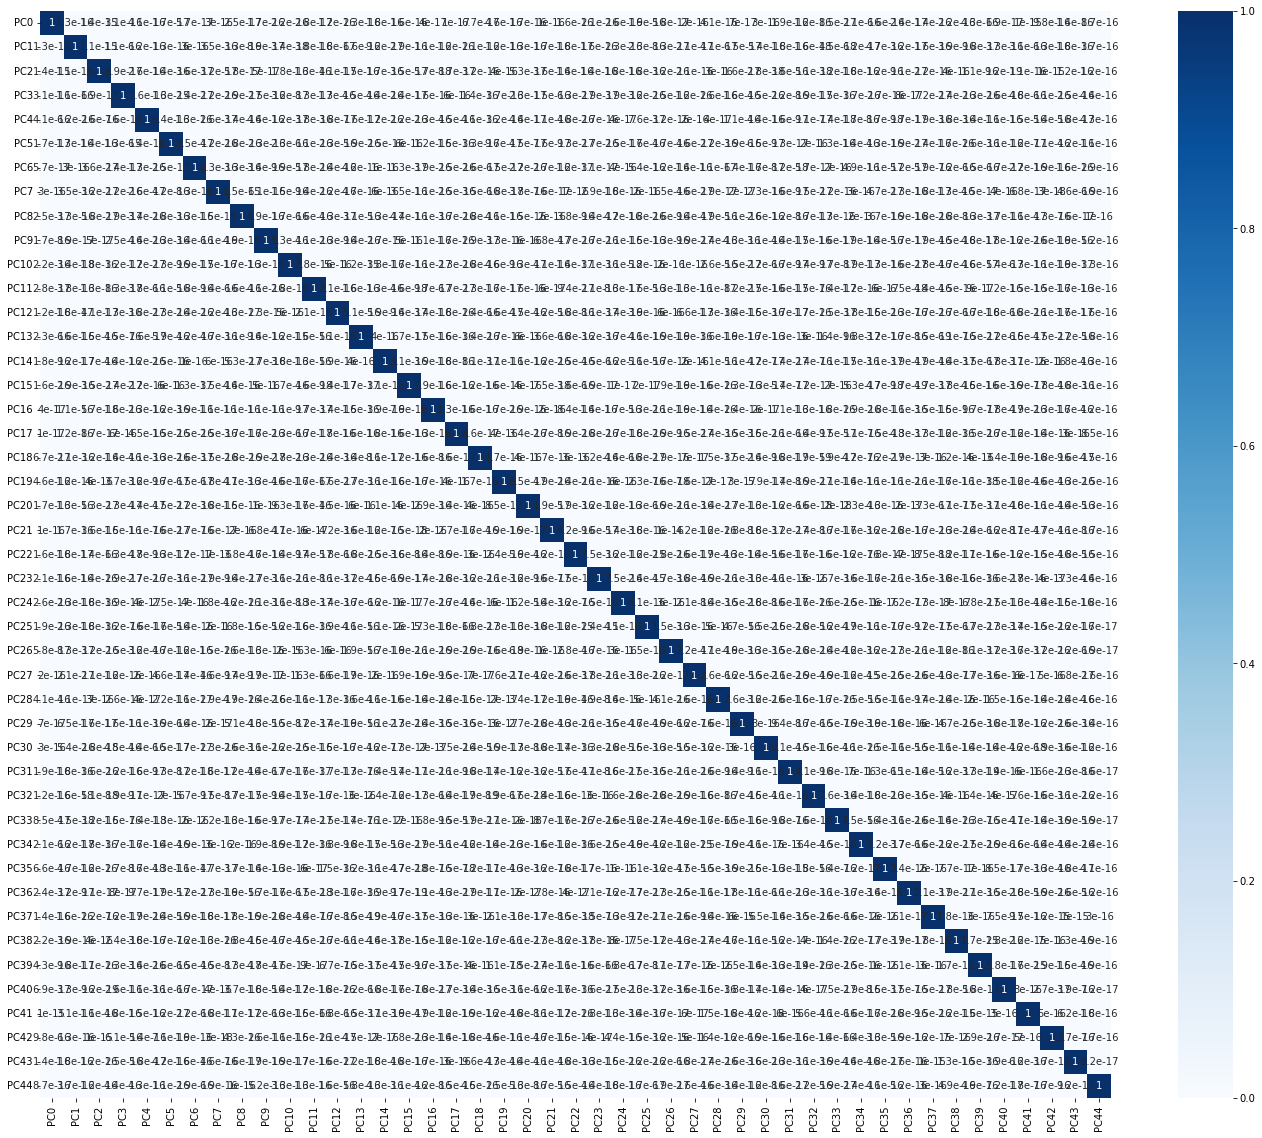

In [85]:
#Compute the correlation matrix after PCA
correlation_analysis = transformed_df_pca.corr().abs()

plt.figure(figsize = (24,20))
sns.heatmap(correlation_analysis, cmap="Blues", annot=True)
plt.show

#transormed_df_pca is the transformed dataset using PCA, it will have 45 features, with a total variance of the dataset of %99,78

#     3 Supervised Data Analysis

### 3.1 Classifier Selection (DecisionTree, NaiveBayes, NN to be decided)

In [86]:
#Splitting the data into sets once again after PCA
X, X_test, y, y_test = train_test_split(
    transformed_df_pca[transformed_df_pca.columns], # X
    df_normalized['good/bad'], # y
    stratify = df_normalized['good/bad'], # stratify the dataset based on class labels
    train_size = 0.8, # percentage of training set
    random_state = 15 
)

# Misclassification costs
cost_fp = 5  # Cost of a False Positive
cost_fn = 1  # Cost of a False Negative

# Set sample weights
sample_weights = [cost_fn if label == 1 else cost_fp for label in y_train]


In [90]:
display(X)
display(X_test)
display(y)
display(y_test)
set(y_test) - set(y_pred)

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
571  0.069902 -1.282782 -0.371414  0.115918  0.070218 -0.907610  0.274472   
600 -1.552903  0.240641 -0.399901 -0.501861  0.080646  0.099350  0.223026   
340  0.571285  1.264230  0.133720  0.731534  0.933571 -0.279584  0.424416   
404  0.488551 -0.749572  0.150325  0.270907 -0.825814  0.164308  1.252379   
293  0.727297 -0.197324  1.166673  1.240117 -0.306626 -0.543730  0.171241   
..        ...       ...       ...       ...       ...       ...       ...   
564  1.183955  0.128151  0.062951 -1.119906  0.061856  0.677063  0.714057   
75   0.887882  0.174056  1.817213  0.823237  0.053505 -0.348466  0.003934   
595 -0.922518  0.208394  0.349269 -0.390342  0.768112  1.108081  1.507199   
485  1.028157  0.454578  0.547972 -1.026926  0.448369  0.084062  0.279168   
133  0.036941  0.081973  0.634538  0.655903 -0.945015 -0.254125 -0.384504   

          PC7       PC8       PC9  ...      PC35      PC36      PC37  \
571 -0.525342 -0.345346 -0.257483  ...  0.212344  0.657934  0.002738   
600 -0.784323 -0.270149  1.150193  ... -0.102847 -0.605510 -0.005386   
340 -0.691629  0.514755  0.791660  ...  0.013525 -0.069217  0.061387   
404  0.179748  0.250383  0.138967  ... -0.068838  0.060157 -0.135951   
293 -0.805642  0.006692  0.168818  ... -0.142512  0.034716 -0.073015   
..        ...       ...       ...  ...       ...       ...       ...   
564  0.816823  1.045532  0.332761  ... -0.102333 -0.053715 -0.239586   
75  -0.647872 -0.398893 -0.308988  ... -0.085865 -0.183019 -0.109498   
595  1.064915  0.194080  0.189618  ...  0.066262 -0.075508 -0.341640   
485  0.579259  0.111294  0.503490  ... -0.018753 -0.073497 -0.113303   
133 -0.292988  0.567587 -0.727716  ... -0.064413 -0.136304  0.002801   

         PC38      PC39      PC40      PC41      PC42      PC43      PC44  
571 -0.299371  0.087279  0.076516 -0.144572 -0.199516  0.181326 -0.045587  
600 -0.094148 -0.164711  0.213614 -0.114450 -0.052634 -0.015571  0.012862  
340 -0.128124  0.166731 -0.329703 -0.010850  0.104836 -0.087804 -0.043335  
404  0.066410 -0.060691 -0.015934 -0.157406 -0.161129  0.146128  0.008001  
293  0.010002  0.248078  0.156654 -0.110401 -0.183678  0.073116  0.013744  
..        ...       ...       ...       ...       ...       ...       ...  
564 -0.136759 -0.184462 -0.013585  0.053965  0.090208  0.016129 -0.079963  
75  -0.330664 -0.382615  0.170784 -0.064912  0.066385  0.067879 -0.003967  
595 -0.242377 -0.207878  0.028418  0.041205 -0.000921 -0.025509 -0.025874  
485  0.020075 -0.158608 -0.140922 -0.283117 -0.293899 -0.100928 -0.051747  
133 -0.192621 -0.130190  0.121466  0.064601  0.214296 -0.092850  0.006194  

[800 rows x 45 columns]

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
496  0.662420  1.499883  0.235951 -0.354129 -0.514870  0.748625  0.176475   
627  0.097221 -0.332757  0.398096  0.176368 -0.618783  0.227421  1.012626   
169  0.660155 -0.059016 -0.034498 -0.200763  0.894646 -0.330737  0.164395   
557  0.507375  0.171238 -0.835623  0.376903  0.648930  0.497833  0.029137   
217  0.015349 -0.071296 -0.469238 -0.986792 -0.400309 -0.305825 -1.131735   
..        ...       ...       ...       ...       ...       ...       ...   
379 -0.393310 -0.769803 -0.300383  0.425288  1.103787  0.705437  0.362805   
665  1.511025 -0.077370  0.570927 -0.599841  0.812324 -0.042152 -0.015371   
285 -0.605038  1.043163  0.226973 -0.993579  0.915798  0.407434 -0.665866   
659  1.081319  0.031675  0.296944 -0.164144  0.296768 -0.717301  0.280005   
856  0.356743  0.365929 -1.358091  0.375714  0.048352  0.514059 -0.322286   

          PC7       PC8       PC9  ...      PC35      PC36      PC37  \
496  0.008092  0.283092  0.431229  ...  0.127344  0.695647  0.061874   
627  0.283994  0.748228  0.511500  ...  0.327301  0.134559 -0.462382   
169 -0.690440  0.123700  1.321944  ... -0.376373  0.201261 -0.210998   
557  1.164942  0.777080 -0.048711  ...  0.110930  0.047138  0.815456   
217 -0.590446  0.346653  0.594687  ...  0.080350  0.122030  0.016239   
..        ...       ...       ...  ...       ...       ...       ...   
379  0.224663  0.380272 -1.176290  ... -0.114638 -0.111755 -0.023399   
665 -0.236627 -0.108007 -0.357464  ...  0.193083  0.832373  0.160531   
285  0.334669 -0.560946  0.110415  ...  0.007647  0.055412  0.081257   
659 -0.188937  0.236385  0.958577  ...  0.029689  0.151476 -0.165967   
856  1.047327 -0.556583  0.506440  ... -0.054599  0.043510  0.030741   

         PC38      PC39      PC40      PC41      PC42      PC43      PC44  
496  0.210283 -0.165853  0.284684 -0.079248  0.084355  0.014010 -0.045843  
627  0.478359 -0.467960  0.040835 -0.025830  0.090668 -0.084034 -0.020245  
169  0.074842  0.081385 -0.343248  0.013335  0.106383  0.001177 -0.023741  
557 -0.039906 -0.128886 -0.241013 -0.054700  0.012461  0.000322 -0.054834  
217  0.177158  0.302210 -0.109666  0.094817 -0.026064 -0.072335 -0.024383  
..        ...       ...       ...       ...       ...       ...       ...  
379 -0.123451 -0.182174  0.218784 -0.093733  0.026940  0.006173  0.015706  
665  0.422741 -0.117543 -0.206747  0.053757 -0.259699 -0.312641  0.504013  
285  0.042867  0.529827  0.201972  0.032538 -0.055605 -0.098696 -0.022859  
659  0.595619 -0.223531  0.208048 -0.156584 -0.134399  0.059919  0.025005  
856 -0.113382 -0.261722 -0.007974  0.133098 -0.143196 -0.002146  0.309250  

[200 rows x 45 columns]

571    0.0
600    0.0
340    0.0
404    0.0
293    0.0
      ... 
564    0.0
75     0.0
595    1.0
485    1.0
133    0.0
Name: good/bad, Length: 800, dtype: float64

496    1.0
627    1.0
169    1.0
557    1.0
217    0.0
      ... 
379    0.0
665    0.0
285    0.0
659    0.0
856    0.0
Name: good/bad, Length: 200, dtype: float64

{0.0}

### 3.2 Cross-Validation

#### Versions using GridSearchCV (not sure it's correct)

In [88]:
#DecisionTree

parameters = {"criterion":('gini', 'entropy', 'log_loss'), 'max_depth':[None, 4, 6, 8, 10, 12, 14],
              'min_samples_split':[2, 3, 4, 5, 6, 7, 8]}

#further split into training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    stratify = y, 
    train_size = 0.5/0.8, 
    random_state = 40
)

DT = DecisionTreeClassifier()
clf_DT = GridSearchCV(DT, parameters, cv = 20, scoring = 'precision')
clf_DT.fit(X_train, y_train, sample_weight = sample_weights)
print('Best Criterion:', clf_DT.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_DT.best_estimator_.get_params()['max_depth'])
print('Best min_sample_split:', clf_DT.best_estimator_.get_params()['min_samples_split'])
print('Best Score:', clf_DT.best_score_)

/home/enrico/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/enrico/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/enrico/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/enrico/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedM

/home/enrico/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/enrico/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/enrico/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/enrico/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedM

Best Criterion: entropy
Best max_depth: 4
Best min_sample_split: 2
Best Score: 0.6371825396825397


#### Manual GridSearch

In [93]:
# iterate over all possible combinations of hyperparameters for decisionTreeClassifier
best_combination = [0,1,2,3]
acc_max = 0
idx = -1
idx_best = idx
info_accuracy_train = []
info_accuracy_val = []

for criterion in ['gini', 'entropy', 'log_loss']:
    for max_depth in [None, 4, 6, 8, 10, 12, 14]:
        for min_samples_split in [2, 3, 4, 5, 6, 7, 8]:
            idx += 1

            random_states = set()
            while len(random_states) < 5:
                n = random.randint(0,1000000)
                random_states.add(n)
        
            accuraries_train_tmp = []
            accuraries_val_tmp = []
            
            # iterate over all random states with same training size to derive the 10 different performance
            for random_state in random_states:
                # further split into training and validation
                X_train_s, X_val_s, y_train, y_val = train_test_split(
                    X, y, 
                    stratify = y, 
                    train_size = 0.5/0.8, 
                    random_state = random_state
                )

                # initialize and fit a model per combination of parameters
                dt_tmp = DecisionTreeClassifier(
                    criterion = criterion, 
                    max_depth = max_depth, 
                    min_samples_split = min_samples_split,
                    random_state = 0
                )
                dt_tmp.fit(X_train_s, y_train, sample_weight = sample_weights)
                accuraries_train_tmp.append(accuracy_score(y_train, dt_tmp.predict(X_train_s)))
                accuraries_val_tmp.append(accuracy_score(y_val, dt_tmp.predict(X_val_s)))
        
            # calculate the statistics to generate overall performance
            accuraries_tmp = np.array(accuraries_train_tmp)
            mean_acc = accuraries_tmp.mean()
            min_acc = accuraries_tmp.min()
            max_acc = accuraries_tmp.max()
            info_accuracy_train.append((mean_acc, min_acc, max_acc))
            
            accuraries_tmp = np.array(accuraries_val_tmp)
            mean_acc = accuraries_tmp.mean()
            min_acc = accuraries_tmp.min()
            max_acc = accuraries_tmp.max()
            info_accuracy_val.append((mean_acc, min_acc, max_acc))

            if mean_acc >= acc_max:
                idx_best = idx
                acc_max = mean_acc
                best_combination[0] = criterion
                best_combination[1] = max_depth
                best_combination[2] = min_samples_split

print(
    f'Best criterion: {best_combination[0]}, ' + \
    f'Best max_depth: {best_combination[1]}, ' + \
    f'Best min_samples_split: {best_combination[2]}'
)
print(f'Best validation accuracy: {acc_max}')

Best criterion: gini, Best max_depth: 8, Best min_samples_split: 8
Best validation accuracy: 0.6900000000000001


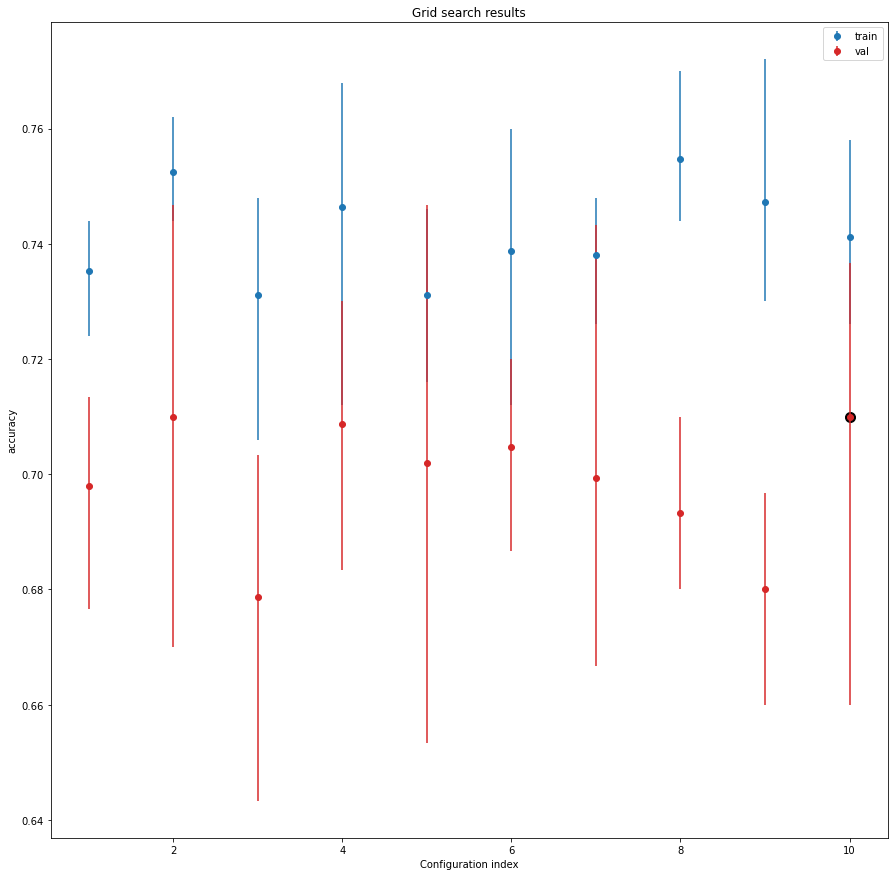

In [99]:
plt.figure(figsize=(15,15))

x = [i for i in range(1, len(info_accuracy_train)+1)]
plt.errorbar(x, [info_accuracy_train[i][0] for i in range(len(info_accuracy_train))],
             yerr=([info_accuracy_train[i][0]-info_accuracy_train[i][1] for i in range(len(info_accuracy_train))],[info_accuracy_train[i][2]-info_accuracy_train[i][0] for i in range(len(info_accuracy_train))]),
             marker='o',
             color='tab:blue', label='train',linestyle='')
plt.errorbar(x, [info_accuracy_val[i][0] for i in range(len(info_accuracy_val))],
             yerr=([info_accuracy_val[i][0]-info_accuracy_val[i][1] for i in range(len(info_accuracy_val))],[info_accuracy_val[i][2]-info_accuracy_val[i][0] for i in range(len(info_accuracy_val))]),
             marker='o',
             color='tab:red', label='val',linestyle='')
plt.title("Grid search results")
plt.xlabel('Configuration index')
plt.ylabel('accuracy')
plt.legend()

plt.scatter(idx_best+1, acc_max, marker='o', color='black',s=100)

plt.show()

#### Versions using GridSearchCV (not sure it's correct)

In [95]:
#GaussianNaiveBayes

parameters = {"var_smoothing":(np.logspace(-9,0,10))}

#further split into training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    stratify = y, 
    train_size = 0.5/0.8, 
    random_state = 40
)

GNB = GaussianNB()
clf_GNB = GridSearchCV(GNB, parameters, cv = 20, scoring = 'precision')
clf_GNB.fit(X_train, y_train, sample_weight = sample_weights)
print('Best Var_Smoothing:', clf_GNB.best_estimator_.get_params()['var_smoothing'])
print('Best Score:', clf_GNB.best_score_)

Best Var_Smoothing: 0.1
Best Score: 0.725


/home/enrico/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/enrico/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/enrico/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/enrico/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedM

#### Manual Grid Search

In [97]:
# iterate over all possible combinations for gaussianNaiveBayes

#QUESTION FOR PROF RANGE OF VAR_SMOOTHING

acc_max = 0
idx = -1
idx_best = idx
info_accuracy_train = []
info_accuracy_val = []

for var_smoothing in (np.logspace(-9,0,10)):
    idx += 1

    random_states = set()
    while len(random_states) < 5:
        n = random.randint(0,1000000)
        random_states.add(n)

    accuraries_train_tmp = []
    accuraries_val_tmp = []
    
    # iterate over all random states with same training size to derive the 10 different performance
    for random_state in random_states:
        # further split into training and validation
        X_train_s, X_val_s, y_train, y_val = train_test_split(
            X, y, 
            stratify = y, 
            train_size = 0.5/0.8, 
            random_state = random_state
        )

        # initialize and fit a model per combination of parameters
        gnb_tmp = GaussianNB()
        gnb_tmp.fit(X_train_s, y_train, sample_weight = sample_weights)
        accuraries_train_tmp.append(accuracy_score(y_train, gnb_tmp.predict(X_train_s)))
        accuraries_val_tmp.append(accuracy_score(y_val, gnb_tmp.predict(X_val_s)))
        
    # calculate the statistics to generate overall performance
    accuraries_tmp = np.array(accuraries_train_tmp)
    mean_acc = accuraries_tmp.mean()
    min_acc = accuraries_tmp.min()
    max_acc = accuraries_tmp.max()
    info_accuracy_train.append((mean_acc, min_acc, max_acc))
    
    accuraries_tmp = np.array(accuraries_val_tmp)
    mean_acc = accuraries_tmp.mean()
    min_acc = accuraries_tmp.min()
    max_acc = accuraries_tmp.max()
    info_accuracy_val.append((mean_acc, min_acc, max_acc))

    if mean_acc >= acc_max:
        idx_best = idx
        acc_max = mean_acc
        best = var_smoothing
        
print(f'Best var_smoothing: {best}')
print(f'Best validation accuracy: {acc_max}')

Best var_smoothing: 1.0
Best validation accuracy: 0.7100000000000002


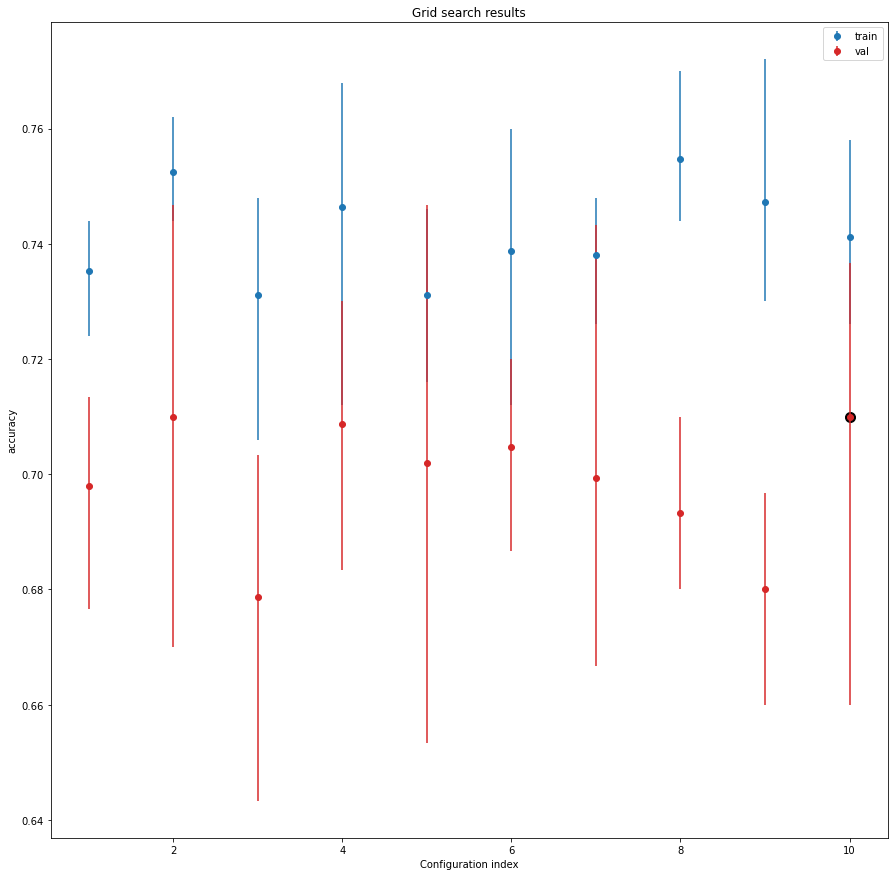

In [101]:
plt.figure(figsize=(15,15))

x = [i for i in range(1, len(info_accuracy_train)+1)]
plt.errorbar(x, [info_accuracy_train[i][0] for i in range(len(info_accuracy_train))],
             yerr=([info_accuracy_train[i][0]-info_accuracy_train[i][1] for i in range(len(info_accuracy_train))],[info_accuracy_train[i][2]-info_accuracy_train[i][0] for i in range(len(info_accuracy_train))]),
             marker='o',
             color='tab:blue', label='train',linestyle='')
plt.errorbar(x, [info_accuracy_val[i][0] for i in range(len(info_accuracy_val))],
             yerr=([info_accuracy_val[i][0]-info_accuracy_val[i][1] for i in range(len(info_accuracy_val))],[info_accuracy_val[i][2]-info_accuracy_val[i][0] for i in range(len(info_accuracy_val))]),
             marker='o',
             color='tab:red', label='val',linestyle='')
plt.title("Grid search results")
plt.xlabel('Configuration index')
plt.ylabel('accuracy')
plt.legend()

plt.scatter(idx_best+1, acc_max, marker='o', color='black',s=100)

plt.show()

### 3.3 Classifier Evaluation

In [102]:
sample_weights_final = [cost_fn if label == 1 else cost_fp for label in y]

              precision    recall  f1-score   support

         0.0       0.72      0.95      0.82       140
         1.0       0.56      0.15      0.24        60

    accuracy                           0.71       200
   macro avg       0.64      0.55      0.53       200
weighted avg       0.67      0.71      0.65       200



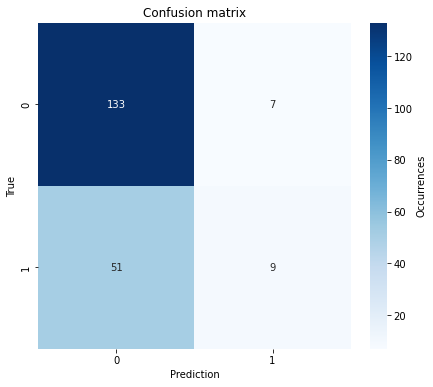

In [103]:
DT_final = DecisionTreeClassifier(
    criterion = best_combination[0], 
    max_depth = best_combination[1], 
    min_samples_split = best_combination[2],
    max_features = best_combination[3],
    random_state = 0
)
DT_final.fit(X, y, sample_weight = sample_weights_final)
y_pred = DT_final.predict(X_test)

# Classification report

print(classification_report(y_test, y_pred))

# get the confusion matrix of test set
confusion = confusion_matrix(y_test, y_pred)

# visualize the confusion matrix
plt.figure(figsize=(7,6))
sns.heatmap(confusion, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'}, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82       140
         1.0       0.00      0.00      0.00        60

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200



/home/enrico/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/enrico/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/enrico/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


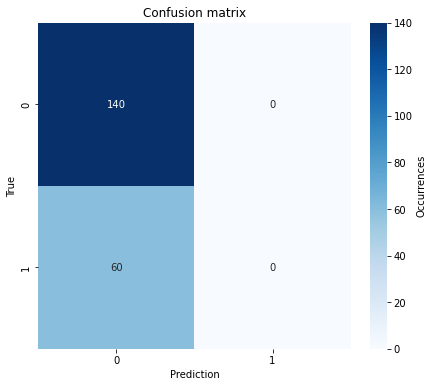

In [104]:
GNB_final = GaussianNB(
    var_smoothing = best)
GNB_final.fit(X, y, sample_weight = sample_weights_final)
y_pred = GNB_final.predict(X_test)

# Classification report

print(classification_report(y_test, y_pred))

# get the confusion matrix of test set
confusion = confusion_matrix(y_test, y_pred)

# visualize the confusion matrix
plt.figure(figsize=(7,6))
sns.heatmap(confusion, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'}, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()